# Information Loss Text

When we employ a pretrained CLIP model, we are constraint to use a
max_length of tokens of 77 (not necessarily representing 77 words). However,
 how many sentences in Artemis and SemArt are longer than that? And on those
 that are longer and hence and not encoded 100%, how much information are we
  missing?

In [6]:
import pandas

from pathlib import Path
from nltk.tokenize import word_tokenize, sent_tokenize
from data_preprocess.tokenizers import BPETokenizer

In [2]:
artemis_csv = Path("../../DATA/artemis/artemis_preprocessed.csv")
artemis = pandas.read_csv(artemis_csv)
artemis

,art_style,painting,emotion,utterance,repetition,split,tokens,tokens_len,utterance_spelled,tokens_encoded,emotion_label
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"She seems very happy in the picture, and you w...",10,train,"['she', 'seems', 'very', 'happy', 'in', 'the',...",18,she seems very happy in the picture and you wa...,"[1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",8
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,sadness,This woman has really knotty hands which makes...,10,train,"['this', 'woman', 'has', 'really', 'knotty', '...",14,this woman has really knotty hands which makes...,"[1, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30...",7
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"When looking at this woman, I am filled with c...",10,train,"['when', 'looking', 'at', 'this', 'woman', 'i'...",27,when looking at this woman i am filled with cu...,"[1, 32, 33, 34, 20, 21, 35, 36, 37, 38, 39, 40...",8
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,contentment,"A woman looking at ease, peaceful, and satisfi...",10,train,"['a', 'woman', 'looking', 'at', 'ease', 'peace...",15,a woman looking at ease peaceful and satisfied...,"[1, 45, 21, 33, 34, 48, 49, 11, 50, 51, 28, 52...",2
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,awe,She looks like a lady from that past that migh...,10,train,"['she', 'looks', 'like', 'a', 'lady', 'from', ...",33,she looks like a lady from that past that migh...,"[1, 4, 56, 30, 45, 57, 58, 59, 60, 59, 61, 62,...",1
...,...,...,...,...,...,...,...,...,...,...,...
454679,Cubism,gino-severini_a-dancer-1,awe,the collection and collage of different colors...,48,train,"['the', 'collection', 'and', 'collage', 'of', ...",12,the collection and collage of different colors...,"[1, 9, 4867, 11, 4370, 89, 272, 78, 11, 83, 10...",1
454680,Romanticism,ivan-aivazovsky_sea-at-night-1861,awe,The peaceful reflections of the moonlight on t...,8,train,"['the', 'peaceful', 'reflections', 'of', 'the'...",14,the peaceful reflections of the moonlight on t...,"[1, 9, 49, 4037, 89, 9, 456, 43, 9, 269, 126, ...",1
454681,Romanticism,ivan-aivazovsky_sea-at-night-1861,excitement,I can imagine the sailors resting this peacefu...,8,train,"['i', 'can', 'imagine', 'the', 'sailors', 'res...",13,i can imagine the sailors resting this peacefu...,"[1, 35, 149, 760, 9, 6361, 1942, 20, 49, 222, ...",3
454682,Romanticism,ivan-aivazovsky_sea-at-night-1861,contentment,The steep mountains and the moonlight provide ...,8,train,"['the', 'steep', 'mountains', 'and', 'the', 'm...",15,the steep mountains and the moonlight provide ...,"[1, 9, 2751, 894, 11, 9, 456, 292, 474, 14, 9,...",2


Mean word count = 15.920571209895224
Min word count = 1


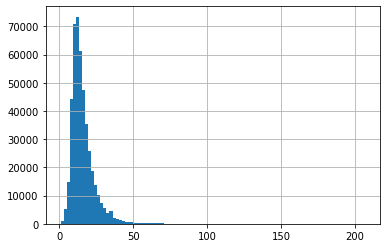

In [3]:
artemis['nb_words'] = artemis['utterance_spelled'].apply(
    lambda s: len(word_tokenize(s))
)
artemis['nb_words'].hist(bins=100)
print(f"Mean word count = {artemis['nb_words'].mean()}")
print(f"Min word count = {artemis['nb_words'].min()}")

Token indices sequence length is longer than the specified maximum sequence length for this model (79 > 77). Running this sequence through the model will result in indexing errors


Mean token count = 18.40034177582673
Min token count = 3


<AxesSubplot:>

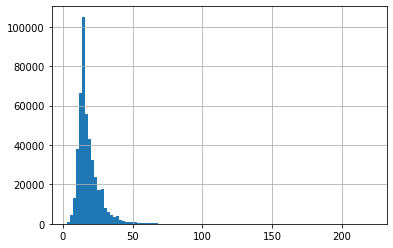

In [4]:
tokenizer = BPETokenizer('clip')
artemis['nb_tokens'] = artemis['utterance_spelled'].apply(
    lambda s: len(tokenizer(s)['input_ids'])
)
print(f"Mean token count = {artemis['nb_tokens'].mean()}")
print(f"Min token count = {artemis['nb_tokens'].min()}")
artemis['nb_tokens'].hist(bins=100)

Sentences with tokens left out = 631/454684 = 0.00
Mean token excess = 19.415213946117273


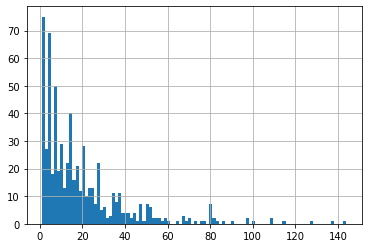

In [5]:
max_len = tokenizer.tokenizer.model_max_length
longest = artemis[artemis['nb_tokens'] > max_len]['nb_tokens'] - max_len
ratio = len(longest)/len(artemis)
longest.hist(bins=100)
print(f"Sentences with tokens left out = {len(longest)}/{(len(artemis))} = "
      f"{ratio:.2f}")
print(f"Mean token excess = {longest.mean()}")

## Semart

In [8]:
semart_csv = Path("../semart.csv")
semart = pandas.read_csv(semart_csv)
semart.dropna(subset=["DESCRIPTION"], inplace=True)
semart

,IMAGE_FILE,DESCRIPTION,AUTHOR,TITLE,TECHNIQUE,DATE,TYPE,SCHOOL,TIMEFRAME,localpath
0,42725-view2.jpg,"The two Mediterranean views, ""Le Soir: A Medit...","VERNET, Claude-Joseph","""Clair de Lune""","Oil on canvas, 72 x 99 cm",1752,landscape,French,1751-1800,/mnt/HDD/DATA/SEMART/Images/42725-view2.jpg
1,05032-femminie.jpg,"This painting is a rare, 18th-century depictio...","BONITO, Giuseppe","""Il Femminiello""","Oil on canvas, 77 x 63 cm",-,genre,Italian,1701-1750,/mnt/HDD/DATA/SEMART/Images/05032-femminie.jpg
2,37941-famil.jpg,"The complex, multi-figure composition probably...","STEEN, Jan","""In weelde siet toe"" (In Luxury, Beware)","Oil on canvas, 105 x 145 cm",1663,genre,Dutch,1651-1700,/mnt/HDD/DATA/SEMART/Images/37941-famil.jpg
3,42724-view1.jpg,"The two Mediterranean views, ""Le Soir: A Medit...","VERNET, Claude-Joseph","""Le Soir""","Oil on canvas, 72 x 99 cm",1752,landscape,French,1751-1800,/mnt/HDD/DATA/SEMART/Images/42724-view1.jpg
4,37916-oudevrij.jpg,In this painting a comical figure is greeting ...,"STEEN, Jan","""Oude Vrijer - Jonge Meid""","Oil on oak panel, 41 x 36 cm",c. 1665,genre,Dutch,1651-1700,/mnt/HDD/DATA/SEMART/Images/37916-oudevrij.jpg
...,...,...,...,...,...,...,...,...,...,...
21377,26703-lu05zer.jpg,"""Shealtiel begat Zerubbabel. Zerubbabel begat ...",MICHELANGELO Buonarroti,Zerubbabel - Abiud - Eliakim,"Fresco, 215 x 430 cm",1511-12,religious,Italian,1501-1550,/mnt/HDD/DATA/SEMART/Images/26703-lu05zer.jpg
21378,43240-zeuxis.jpg,This painting was exhibited at the Salon of 17...,"VINCENT, Francois-Andre",Zeuxis Choosing his Models for the Image of He...,"Oil on canvas, 102 x 137 cm",1789,historical,French,1751-1800,/mnt/HDD/DATA/SEMART/Images/43240-zeuxis.jpg
21379,03589-06ventur.jpg,The most important of the thematic cycle is th...,"BECCAFUMI, Domenico",Zeuxis and the Maidens of Croton,Fresco,1519-23,mythological,Italian,1501-1550,/mnt/HDD/DATA/SEMART/Images/03589-06ventur.jpg
21380,19997-5zrinyi.jpg,"In 1566, in the Battle of Szigetvar a vastly o...","HOLLOSY, Simon",Zrinyi's Charge on the Turks from the Fortress...,"Oil on wood, 23,5 x 36 cm",1896,historical,Hungarian,1851-1900,/mnt/HDD/DATA/SEMART/Images/19997-5zrinyi.jpg


Mean sentence count = 4.4240950332055
Mean sentence count = 1


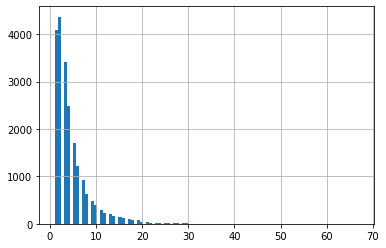

In [9]:
semart['nb_sentences'] = semart['DESCRIPTION'].apply(
    lambda s: len(sent_tokenize(s))
)
semart['nb_sentences'].hist(bins=100)
print(f"Mean sentence count = {semart['nb_sentences'].mean()}")
print(f"Mean sentence count = {semart['nb_sentences'].min()}")

Mean word count = 109.85857263118511
Mean word count = 4


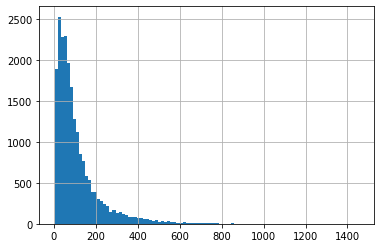

In [10]:
semart['nb_words'] = semart['DESCRIPTION'].apply(
    lambda s: len(word_tokenize(s))
)
semart['nb_words'].hist(bins=100)
print(f"Mean word count = {semart['nb_words'].mean()}")
print(f"Min word count = {semart['nb_words'].min()}")

Token indices sequence length is longer than the specified maximum sequence length for this model (119 > 77). Running this sequence through the model will result in indexing errors


Mean token count = 128.722850996165
Min token count = 6


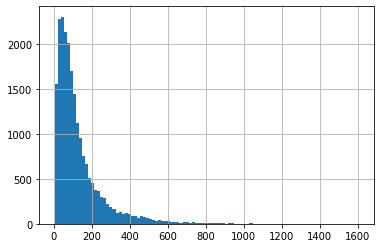

In [11]:
tokenizer = BPETokenizer('clip')
semart['nb_tokens'] = semart['DESCRIPTION'].apply(
    lambda s: len(tokenizer(s)['input_ids'])
)
semart['nb_tokens'].hist(bins=100)
print(f"Mean token count = {semart['nb_tokens'].mean()}")
print(f"Min token count = {semart['nb_tokens'].min()}")

Sentences with tokens left out = 930/94596 = 0.01
Mean token excess = 14.834408602150537


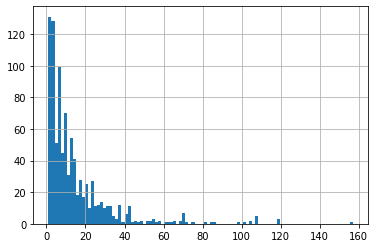

In [9]:
max_len = tokenizer.tokenizer.model_max_length
longest = semart[semart['nb_tokens'] > max_len]['nb_tokens'] - max_len
ratio = len(longest)/len(semart)
longest.hist(bins=100)
print(f"Sentences with tokens left out = {len(longest)}/{(len(semart))} = "
      f"{ratio:.2f}")
print(f"Mean token excess = {longest.mean()}")